In [26]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime

In [128]:
df=pd.read_csv('delivery.txt')
df['DELIVERY_DATE']=pd.to_datetime(df['DELIVERY_DATE'])
df=df.fillna(df.median())

0     2
1     3
2     4
3     0
4     1
     ..
75    2
76    3
77    4
78    5
79    6
Name: DELIVERY_DATE, Length: 80, dtype: int64

In [66]:
df['weekend']=np.where(df['DELIVERY_DATE'].dt.weekday<5,0,1)
df['day_of_week']=df['DELIVERY_DATE'].dt.weekday
df['day_of_month']=df['DELIVERY_DATE'].dt.day
df['day_of_year']=(df['DELIVERY_DATE']-datetime.datetime.strptime('01/01/2019',"%d/%m/%Y")).astype('timedelta64[D]')

In [129]:
df.columns

Index(['DELIVERY_DATE', 'DELIVERED_VOLUME', 'Facility_A', 'Facility_B',
       'Facility_C', 'Facility_D', 'Facility_E', 'Facility_F', 'Facility_G',
       'Facility_H', 'Facility_I', 'Facility_J', 'Facility_K'],
      dtype='object')

In [68]:
df.head()

,DELIVERY_DATE,DELIVERED_VOLUME,Facility_A,Facility_B,Facility_C,Facility_D,Facility_E,Facility_F,Facility_G,Facility_H,Facility_I,Facility_J,Facility_K,weekend,day_of_week,day_of_month,day_of_year
0,2019-03-13,1232.0,250.0,26.0,175.0,1.0,265.0,63.0,331.0,95.0,14.0,11.5,9.5,0,2,13,71.0
1,2019-03-14,1232.0,250.0,26.0,175.0,8.0,265.0,63.0,331.0,95.0,14.0,11.5,9.5,0,3,14,72.0
2,2019-03-15,1232.0,250.0,1.0,175.0,6.0,265.0,63.0,331.0,95.0,14.0,11.5,9.5,0,4,15,73.0
3,2019-03-18,1232.0,250.0,26.0,175.0,55.0,3.0,63.0,45.0,86.0,14.0,16.0,9.5,0,0,18,76.0
4,2019-03-19,1232.0,13.0,26.0,175.0,3.0,9.0,80.0,243.0,80.0,14.0,6.0,9.5,0,1,19,77.0


In [76]:
df=df.set_index('DELIVERY_DATE')

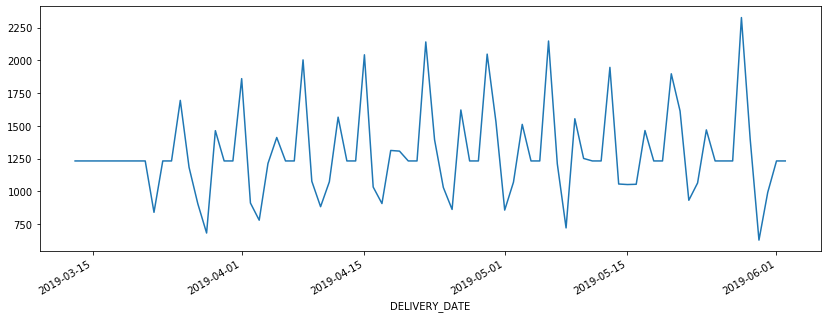

In [78]:
fig, ax = plt.subplots(figsize=(14,5))
df['DELIVERED_VOLUME'].plot()

In [7]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [8]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df['DELIVERED_VOLUME'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1363.0523918685935
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1110.1920629471992
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1041.7490923869668
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:826.4094575958023
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1056.0147563480537
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1008.8304449060505
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:854.8605681122036
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:825.9328742627399
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1276.2793107278796
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1061.3265629449422
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1027.2557126010065
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:814.7303421246382
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1055.9083942987668
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:996.6742433766341
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:855.6252630630579
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:813.849050556839
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1191.559498600457
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1013.3707015866038
A

### ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:799.143502598055 is the best

In [9]:
mod = sm.tsa.statespace.SARIMAX(df['DELIVERED_VOLUME'],
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0001     61.802     -0.016      0.987    -122.130     120.130
ar.S.L12      -0.3178      0.162     -1.966      0.049      -0.635      -0.001
ma.S.L12      -1.0009     61.785     -0.016      0.987    -122.097     120.096
sigma2       1.26e+05      0.000   3.68e+08      0.000    1.26e+05    1.26e+05


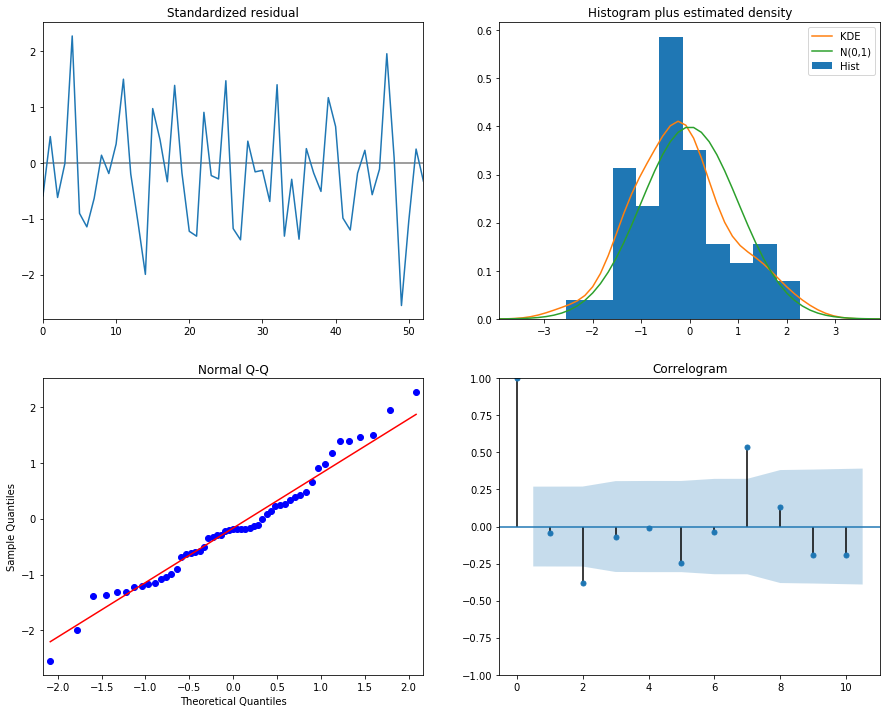

In [10]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [11]:
pred = results.get_prediction(start=pd.to_datetime('2019-03-15'), dynamic=False)
pred_ci = pred.conf_int()

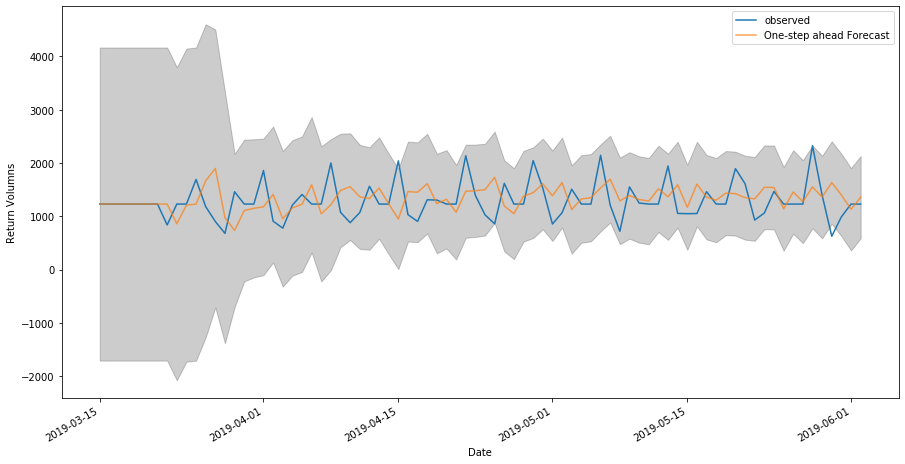

In [12]:
ax = df['DELIVERED_VOLUME']['2019-3-15':].plot(label='observed',figsize=(15, 8))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Return Volumns')
plt.legend()

plt.show()

## Base Line Model Prediction

In [42]:
results.forecast(5)

80    1324.786455
81    1496.006286
82    1455.380892
83    1385.871029
84    1361.447606
dtype: float64

## Model 2: Multivariate Time Series + Supervised Model

In [43]:
from statsmodels.tsa.api import VAR

In [79]:
train=df.iloc[:,1:]
train

,Facility_A,Facility_B,Facility_C,Facility_D,Facility_E,Facility_F,Facility_G,Facility_H,Facility_I,Facility_J,Facility_K,weekend,day_of_week,day_of_month,day_of_year
DELIVERY_DATE,,,,,,,,,,,,,,,
2019-03-13,250.0,26.0,175.0,1.0,265.0,63.0,331.0,95.0,14.0,11.5,9.5,0,2,13,71.0
2019-03-14,250.0,26.0,175.0,8.0,265.0,63.0,331.0,95.0,14.0,11.5,9.5,0,3,14,72.0
2019-03-15,250.0,1.0,175.0,6.0,265.0,63.0,331.0,95.0,14.0,11.5,9.5,0,4,15,73.0
2019-03-18,250.0,26.0,175.0,55.0,3.0,63.0,45.0,86.0,14.0,16.0,9.5,0,0,18,76.0
2019-03-19,13.0,26.0,175.0,3.0,9.0,80.0,243.0,80.0,14.0,6.0,9.5,0,1,19,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-29,284.0,36.0,206.0,46.0,328.0,79.0,414.0,69.0,14.0,10.0,8.0,0,2,29,148.0
2019-05-30,264.0,21.0,179.0,9.0,382.0,71.0,311.0,104.0,9.0,12.0,8.0,0,3,30,149.0
2019-05-31,208.0,52.0,163.0,48.0,312.0,79.0,401.0,109.0,8.0,8.0,10.0,0,4,31,150.0


In [45]:
model=VAR(train)
model_fit = model.fit()
pred = model_fit.forecast(model_fit.y, steps=5)
print(pred)

[[2.69615578e+02 2.26212464e+01 1.83958349e+02 3.84398367e+01
  2.14127124e+02 6.15823439e+01 4.02423173e+02 9.86168725e+01
  1.51147883e+01 1.44112651e+01 9.27605963e+00 5.77145893e-01
  3.50123356e+00 3.89463847e+00 1.52953668e+02]
 [2.82209581e+02 2.88007042e+01 2.10346061e+02 4.16708380e+01
  2.78087854e+02 6.82815266e+01 3.75601905e+02 9.19312403e+01
  1.67261802e+01 1.32710176e+01 1.04909439e+01 3.82272605e-01
  2.80483395e+00 6.42173104e+00 1.53926755e+02]
 [2.73145193e+02 3.11695659e+01 2.04656060e+02 3.92215853e+01
  2.88835402e+02 7.02651314e+01 3.81249839e+02 9.69147916e+01
  1.60305484e+01 1.39601715e+01 9.77185063e+00 2.88576575e-01
  2.76183662e+00 7.95392871e+00 1.54883207e+02]
 [2.71951921e+02 3.11078197e+01 2.02878268e+02 3.90463086e+01
  2.90985404e+02 6.85282639e+01 3.75117024e+02 9.61956995e+01
  1.54994483e+01 1.36075217e+01 9.80815525e+00 2.56192629e-01
  2.92201560e+00 9.20543242e+00 1.55836338e+02]
 [2.65714190e+02 2.99030824e+01 1.99614843e+02 3.91177785e+01
  

## Appending Facility Prediction To DF

In [176]:
df2=df.reset_index()

In [22]:
# df2=df.reset_index().drop(['DELIVERED_VOLUME','DELIVERY_DATE'],axis=1)

In [177]:
drange=pd.date_range(start='2019-06-03',end='2019-06-07')

for i in range(5):
    zipp=dict(zip(['Facility_A', 'Facility_B', 'Facility_C',
       'Facility_D', 'Facility_E', 'Facility_F', 'Facility_G', 'Facility_H',
       'Facility_I', 'Facility_J', 'Facility_K'],pred[i]))
    zipp['DELIVERY_DATE']=drange[i]
    
    df2=df2.append(zipp,ignore_index=True)
    
    
df2['weekend']=np.where(df2['DELIVERY_DATE'].dt.weekday<5,0,1)
# df2['day_of_week']=df2['DELIVERY_DATE'].dt.weekday
# df2['day_of_month']=df2['DELIVERY_DATE'].dt.day
# df2['day_of_year']=(df2['DELIVERY_DATE']-datetime.datetime.strptime('01/01/2019',"%d/%m/%Y")).astype('timedelta64[D]')

In [181]:
df2.tail(5)

,index,DELIVERY_DATE,DELIVERED_VOLUME,Facility_A,Facility_B,Facility_C,Facility_D,Facility_E,Facility_F,Facility_G,Facility_H,Facility_I,Facility_J,Facility_K,weekend
80,NaN,2019-06-03,NaN,269.615578,22.621246,183.958349,38.439837,214.127124,61.582344,402.423173,98.616872,15.114788,14.411265,9.276060,0
81,NaN,2019-06-04,NaN,282.209581,28.800704,210.346061,41.670838,278.087854,68.281527,375.601905,91.931240,16.726180,13.271018,10.490944,0
82,NaN,2019-06-05,NaN,273.145193,31.169566,204.656060,39.221585,288.835402,70.265131,381.249839,96.914792,16.030548,13.960171,9.771851,0
83,NaN,2019-06-06,NaN,271.951921,31.107820,202.878268,39.046309,290.985404,68.528264,375.117024,96.195699,15.499448,13.607522,9.808155,0
84,NaN,2019-06-07,NaN,265.714190,29.903082,199.614843,39.117779,282.366212,67.748876,372.496685,94.173606,15.410662,13.383417,9.718995,0


In [125]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [127]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

reg = xgb.XGBRegressor(learning_rate=0.02, n_estimators=600,
                    silent=True, nthread=1)

In [148]:
df2.columns

Index(['index', 'DELIVERY_DATE', 'DELIVERED_VOLUME', 'Facility_A',
       'Facility_B', 'Facility_C', 'Facility_D', 'Facility_E', 'Facility_F',
       'Facility_G', 'Facility_H', 'Facility_I', 'Facility_J', 'Facility_K',
       'weekend'],
      dtype='object')

In [146]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df['DELIVERY_DATE']
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
 

    
    X = df[['Facility_A',
       'Facility_B', 'Facility_C', 'Facility_D', 'Facility_E', 'Facility_F',
       'Facility_G', 'Facility_H', 'Facility_I', 'Facility_J', 'Facility_K','hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear','weekend']]
    if label:
        y = df[label]
        return X, y
    return X

In [182]:
split_date = '2019-06-02'
df_train =df2.loc[df2['DELIVERY_DATE'] <= split_date].copy()
df_test = df2.loc[df2['DELIVERY_DATE']> split_date].copy()

X_train, y_train = create_features(df_train, label='DELIVERED_VOLUME')
X_test, y_test = create_features(df_test, label='DELIVERED_VOLUME')

In [183]:
X_test=X_test.fillna(X_test.mean())
y_test=y_test.fillna(y_train.mean())

In [184]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[01:16:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

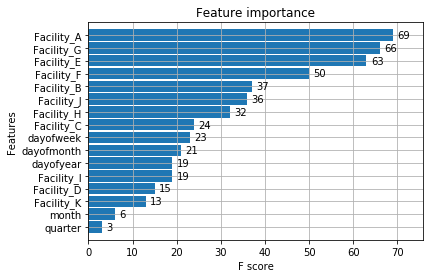

In [185]:
_ = plot_importance(reg, height=0.9)

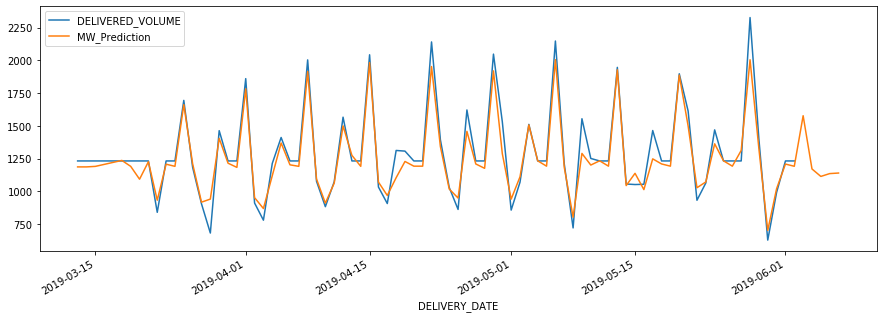

In [198]:
df_train['MW_Prediction'] = reg.predict(X_train)
df_test['MW_Prediction'] = reg.predict(X_test)
df_all = pd.concat([df_test, df_train], sort=False)
df_all=df_all.set_index('DELIVERY_DATE')
_ = df_all[['DELIVERED_VOLUME','MW_Prediction']].plot(figsize=(15, 5))

In [199]:
reg.predict(X_test)

array([1577.0537, 1170.7888, 1113.8607, 1135.4537, 1139.7538],
      dtype=float32)

## Tree Models

## Model 3: Lag + Supervised Model

In [ ]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2019-05-15'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

y_forecasted = pred_dynamic.predicted_mean
y_truth = df['DELIVERED_VOLUME']['2019-05-15':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [ ]:
pred = results.forecast(5)

In [ ]:
df['day_of_year']

In [ ]:
df['date']=df.index

In [ ]:
df.columns

In [ ]:
train=df[]

In [ ]:
df[:]

In [ ]:
model = VAR(endog=df)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR